In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import scipy.stats as stats
from scipy.stats import linregress

us_daily = pd.read_csv('us_daily.csv')

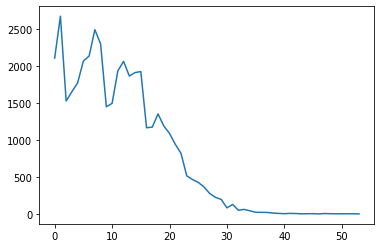

In [14]:
us_daily
mortality_change = us_daily['deathIncrease'].to_list()

plt.plot(mortality_change)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,Ratio
0,20200422,56,826936,3639623.0,4191.0,58173.0,85465.0,15341.0,2370.0,5474.0,...,85465.0,4470750,4466559,4466559,2108.0,1173.0,284162.0,27219.0,311381.0,0.185139
1,20200421,56,799717,3355461.0,3956.0,58468.0,84292.0,15228.0,2315.0,5514.0,...,84292.0,4159134,4155178,4155178,2674.0,1413.0,124434.0,27193.0,151627.0,0.192463
2,20200420,56,772524,3231027.0,4037.0,55509.0,82879.0,14691.0,2193.0,5567.0,...,82879.0,4007588,4003551,4003551,1528.0,1998.0,114366.0,23321.0,137687.0,0.192960
3,20200419,56,749203,3116661.0,11324.0,55565.0,80881.0,14548.0,2145.0,5603.0,...,80881.0,3877188,3865864,3865864,1654.0,2042.0,140309.0,27021.0,167330.0,0.193800
4,20200418,56,722182,2976352.0,9906.0,56575.0,78839.0,14788.0,2096.0,5729.0,...,78839.0,3708440,3698534,3698534,1774.0,884.0,113379.0,27662.0,141041.0,0.195262
5,20200417,56,694520,2862973.0,10889.0,57858.0,77955.0,14910.0,2052.0,6096.0,...,77955.0,3568382,3557493,3557493,2069.0,3250.0,125169.0,31260.0,156429.0,0.195227
6,20200416,56,663260,2737804.0,16927.0,58628.0,74705.0,15150.0,1834.0,5940.0,...,74705.0,3417991,3401064,3401064,2136.0,5102.0,127705.0,30604.0,158309.0,0.195015
7,20200415,56,632656,2610099.0,16901.0,59420.0,69603.0,14667.0,1783.0,6032.0,...,69603.0,3259656,3242755,3242755,2492.0,2056.0,131186.0,30183.0,161369.0,0.195098
8,20200414,56,602473,2478913.0,16615.0,58718.0,67547.0,14039.0,1715.0,5975.0,...,67547.0,3098001,3081386,3081386,2299.0,4874.0,120681.0,25699.0,146380.0,0.195520
9,20200413,56,576774,2358232.0,17159.0,55264.0,62673.0,13632.0,1628.0,6168.0,...,62673.0,2952165,2935006,2935006,1450.0,1472.0,104166.0,24948.0,129114.0,0.196515


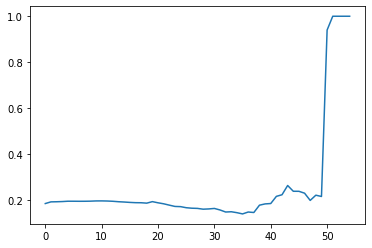

In [15]:
us_daily["Ratio"] = us_daily['positive'] / us_daily['totalTestResults'] 
ratio_data = us_daily['Ratio'].to_list()

plt.plot(ratio_data)

us_daily

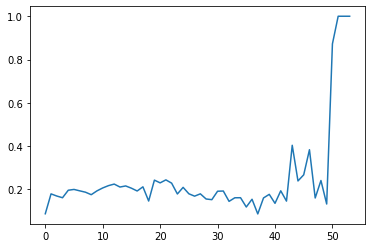

In [16]:
us_daily['ratio_daily'] = us_daily['positiveIncrease'] / us_daily['totalTestResultsIncrease']
ratio_change = us_daily['ratio_daily'].to_list()

plt.plot(ratio_change)

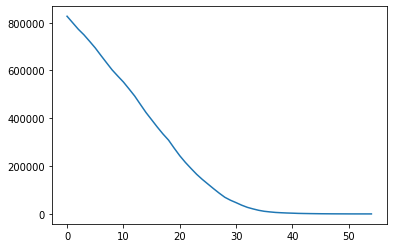

In [17]:
plt.plot(us_daily['positive'])

In [18]:
states_daily = pd.read_csv('states_daily_4pm_et.csv')
states_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200422,AK,335.0,11824.0,NaN,39.0,36.0,NaN,NaN,NaN,...,36.0,12159.0,12159.0,12159.0,2,0.0,0.0,1034.0,6.0,1040.0
1,20200422,AL,5465.0,43295.0,NaN,NaN,730.0,NaN,288.0,NaN,...,730.0,48760.0,48760.0,48760.0,1,17.0,31.0,0.0,234.0,234.0
2,20200422,AR,2276.0,27437.0,NaN,97.0,291.0,NaN,NaN,23.0,...,291.0,29713.0,29713.0,29713.0,5,-1.0,0.0,2223.0,49.0,2272.0
3,20200422,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,20200422,AZ,5459.0,51142.0,NaN,664.0,NaN,300.0,NaN,195.0,...,NaN,56601.0,56601.0,56601.0,4,21.0,0.0,1241.0,208.0,1449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,20200301,MI,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,9.0,9.0,26,NaN,NaN,NaN,NaN,NaN
2672,20200301,RI,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,44,NaN,NaN,NaN,NaN,NaN
2673,20200301,WA,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.0,30.0,30.0,53,3.0,0.0,0.0,12.0,12.0
2674,20200229,WA,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.0,18.0,18.0,53,1.0,0.0,0.0,9.0,9.0


In [19]:
state_data = states_daily.groupby(['state'])['positive'].count()

In [20]:
states = states_daily.set_index('state')

states.sort_index()

states = states.groupby(['state'])['positive'].max().to_frame()

In [34]:
density = pd.read_excel('population_density.xlsx')

def regress(x_values,y_values):
    corr = stats.pearsonr(x_values,y_values)
    print(f'The correlation coefficient is {round(corr[0],2)}')
    print(f'The P Value is {corr[1]}')
    x_series = pd.Series(x_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_series * slope + intercept
    plt.plot(x_values, regress_values, 'r-')

The correlation coefficient is 0.4
The P Value is 0.004464940094622526


Text(0.5, 1.0, 'Population Density vs. Confirmed Cases Per State')

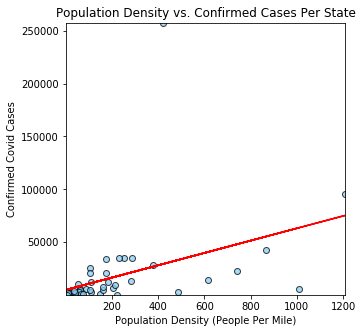

In [33]:
density_df = density.set_index('AL')

density_df = density_df.join(states, how = 'inner')

density_df.columns = ['density', 'cases']

density_list = density_df['density'].to_list()

cases_list = density_df['cases'].to_list()

plt.figure(figsize=(5,5))
regress(density_list, cases_list)
plt.scatter(density_df['density'], density_df['cases'], marker="o", facecolors="lightskyblue", edgecolors="black",
            alpha=.75)

plt.xlim((min(density_list), max(density_list)))
plt.ylim((min(cases_list), max(cases_list)))
plt.xlabel('Population Density (People Per Mile)')
plt.ylabel('Confirmed Covid Cases')
plt.title('Population Density vs. Confirmed Cases Per State')


In [69]:
correlation = stats.pearsonr(density_list, cases_list)
correlation

(0.39943904665119123, 0.004464940094622526)